In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/My_ML_Labs/Lab_04/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Gender' column to numerical values
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])  # Male=1, Female=0

In [8]:
X = dataset[['User ID', 'Gender', 'Age', 'EstimatedSalary']]
y = dataset['Purchased']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression()

In [11]:
predictions = logistic.predict(X_test)

In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        77
           1       0.88      0.65      0.75        43

    accuracy                           0.84       120
   macro avg       0.85      0.80      0.82       120
weighted avg       0.85      0.84      0.84       120



Confusion Matrix:
[[73  4]
 [15 28]]




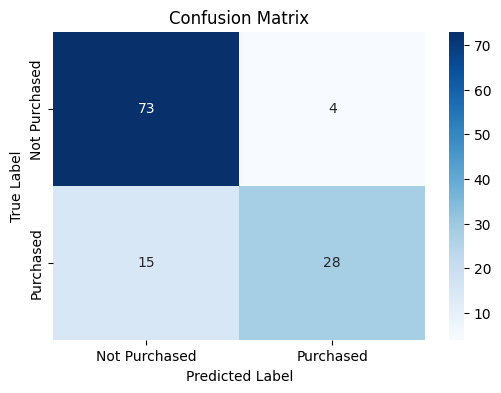

In [13]:
import seaborn as sns
# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)
print("\n")

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

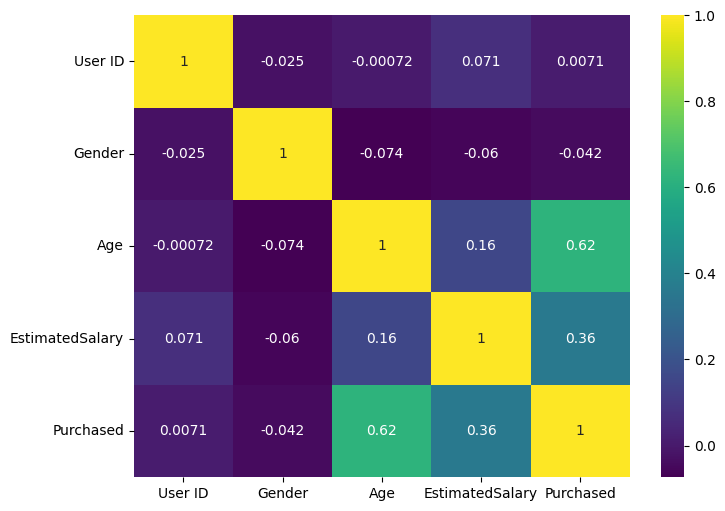

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(),annot=True,cmap='viridis')
plt.show()

Optimized theta: [-0.62892003 -0.0151244   0.00945342  1.27204914  0.66309166]
Final cost: 0.3864542380805962


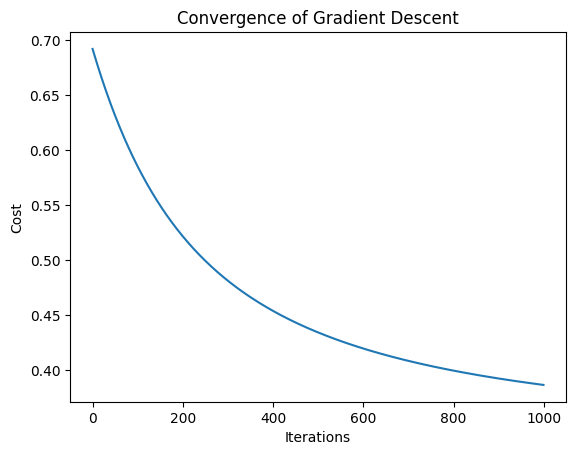

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       257
           1       0.84      0.69      0.76       143

    accuracy                           0.84       400
   macro avg       0.84      0.81      0.82       400
weighted avg       0.84      0.84      0.84       400



In [14]:
import numpy as np


# Feature scaling for gradient descent to converge faster
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term to X (i.e., a column of ones)
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Initialize parameters (theta)
theta = np.zeros(X.shape[1])

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))  # Use np.dot for matrix multiplication
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))  # Use np.dot for matrix multiplication
        gradient = (1/m) * np.dot(X.T, (h - y))  # Gradient calculation
        theta = theta - alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

# Set hyperparameters
alpha = 0.01
iterations = 1000

# Perform Gradient Descent
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Output optimized theta values and cost history
print("Optimized theta:", theta)
print("Final cost:", cost_history[-1])

# Plot the cost history to see the convergence of gradient descent
import matplotlib.pyplot as plt
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence of Gradient Descent')
plt.show()

# Now use the final theta to make predictions
def predict(X, theta):
    probability = sigmoid(np.dot(X, theta))  # Use np.dot for matrix multiplication
    return [1 if p >= 0.5 else 0 for p in probability]

# Make predictions using the trained model
predictions = predict(X, theta)

# Evaluate the performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, predictions))